In [2]:
# Example of chaotic migration using dynamical tides operator
import rebound
import reboundx
from matplotlib import pyplot as plt
from reboundx import constants
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 14})

# intial conditions
a0 = 1.5
e0 = 0.01
R_star = 4.65e-3 # 1 solar radius
R_planet = 1.6 * 4.67e-4 # 1.6 Jupiter radii
m_planet = 0.95e-3 # approximately 1 Jupiter mass

# create simulation
sim = rebound.Simulation()
sim.add(m=1, r = R_star)
sim.add(m=m_planet, r=R_planet, a=a0, e=e0)
sim.add(m=1, a=50, inc=85 * np.pi / 180)
sim.move_to_com()

# load reboundx and the dynamical tides operator
rebx = reboundx.Extras(sim)
td = rebx.load_force('tides_dynamical')
rebx.add_force(td)


# load tides_constant_time_lag
time_lag = rebx.load_force("tides_constant_time_lag")
rebx.add_force(time_lag)
sim.particles[0].params['tctl_k2'] = 0.03
sim.particles[1].params['tctl_k2'] = 0.25
sim.particles[1].params['tctl_tau'] = 2*np.pi / (3600*24*365.25) # 1 second

# load gr
gr = rebx.load_force("gr_full")
rebx.add_force(gr)
gr.params["c"] = constants.C

# set dP_crit = 0 to always carry out mode evolution
sim.particles[1].params['td_dP_crit'] = 0

# set initial modes to 0
sim.particles[1].params['td_c_imag'] = 0
sim.particles[1].params['td_c_real'] = 0

# record initial orbital energy
o = sim.particles[1].orbit(primary=sim.particles[0])
EB0 = -sim.G * sim.particles[1].m * sim.particles[0].m / (2 * o.a)

N = 10000
t = np.linspace(0, 2e5, N) # time
a = np.zeros(N) # semi-major axis
a2 = np.zeros(N) # semi-major axis of binary
e2 = np.zeros(N) # semi-major axis of binary
e = np.zeros(N) # eccenricity
E = np.zeros(N) # mode energy
E_sim = np.zeros(N) # simulation energy
inc = np.zeros(N)

for i, time in enumerate(t):
    o = sim.particles[1].orbit(primary=sim.particles[0])
    a[i] = o.a
    e[i] = o.e
    E[i] = abs(EB0) * (sim.particles[1].params['td_c_imag']**2 + sim.particles[1].params['td_c_real']**2)
    
    
    E_sim[i] = sim.energy()

    o2 = sim.particles[2].orbit(primary=sim.particles[0])
    a2[i] = o2.a
    e2[i] = o2.e

    inc[i] = o.inc

    
    if i % 100 == 0 and i != 0:
        print(time, o.a, o.e, E[i], sim.particles[1].params['td_dP_hat'])
        
    
    sim.integrate(2 * np.pi * time)
    



2000.2000200020002 1.4999858819695688 0.010806983876165702 0.0 0.0
4000.4000400040004 1.4999211004695345 0.0136242951571688 0.0 0.0
6000.600060006001 1.4998903546031308 0.018151914120470864 0.0 0.0
8000.800080008001 1.4999615531935684 0.024981763935632405 0.0 0.0
10001.000100010002 1.4999805973689189 0.03476168212734443 0.0 0.0
12001.200120012001 1.4999186882155187 0.04838182907568633 0.0 0.0
14001.400140014002 1.4998973643425701 0.0677061027288198 0.0 0.0
16001.600160016002 1.4999715973735346 0.09462269623420663 0.0 0.0
18001.800180018003 1.4999995548684524 0.1321275364029729 0.0 0.0
20002.000200020004 1.4998710340640364 0.18438700652206977 0.0 0.0
22002.200220022005 1.4998953593255853 0.2560414894617938 0.0 0.0
24002.400240024002 1.500005931050238 0.3529670881030915 0.0 0.0
26002.600260026004 1.4998604648959655 0.4795390539643332 0.0 0.0
28002.800280028005 1.4999865162386097 0.6338951387415988 0.0 0.0
30003.000300030006 1.4999649581148986 0.7997466848488068 1.0799249096110452e-249 2.

Text(0.5, 0, 'Time (kyr)')

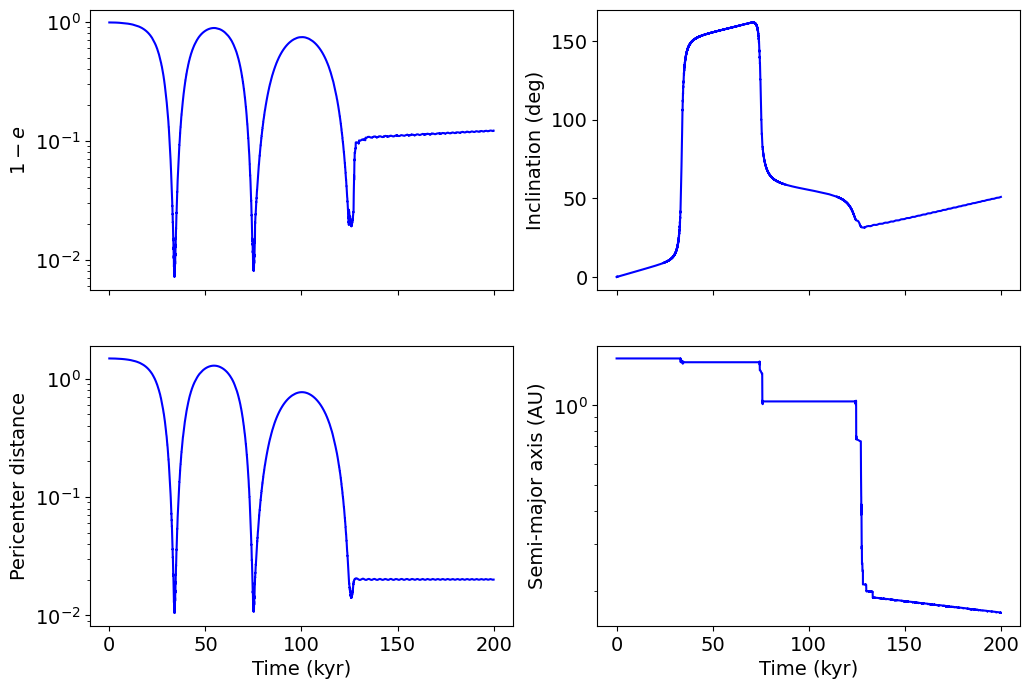

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
axes[0, 0].plot(t/1e3, 1-e, c='blue')
axes[0, 0].set_ylabel(r"$1-e$")
axes[0, 0].set_yscale("log")

axes[1, 0].plot(t/1e3, a*(1-e), c='blue')
axes[1, 0].set_ylabel(r"Pericenter distance")
axes[1, 0].set_yscale("log")
axes[1, 0].set_xlabel("Time (kyr)")

axes[0, 1].plot(t/1e3, inc * 180 / np.pi, c='blue')
axes[0, 1].set_ylabel(r"Inclination (deg)")

axes[1, 1].plot(t/1e3, a, c='blue')
axes[1, 1].set_ylabel(r"Semi-major axis (AU)")
axes[1, 1].set_yscale("log")
axes[1, 1].set_xlabel("Time (kyr)")